<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from numpy import array
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


In [103]:
resturantreviews = pd.read_csv("sentiment (1).csv")
resturantreviews.isnull().values.any()
resturantreviews.shape

(2001, 13)

In [104]:
resturantreviews.head()

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,Processed_Tweets,Polarity,Sentiment
0,0,2022-12-13 21:07:15+00:00,1602772160569016321,https://twitter.com/1899Gallego/status/1602772...,1899Gallego,Twitter for iPhone,NaN,@FIFAWorldCup @adidasfootball Messi monster,0,0,messi monster,0.000000,NaN
1,1,2022-12-13 21:07:15+00:00,1602772160464015361,https://twitter.com/Affellariouz/status/160277...,Affellariouz,Twitter for Android,NaN,I don't say may Argentina 🇦🇷 no enter final bu...,0,0,i dont say may argentina no enter final but ma...,0.000000,NaN
2,2,2022-12-13 21:07:15+00:00,1602772160011194368,https://twitter.com/moneyjumpin/status/1602772...,moneyjumpin,Twitter for iPhone,NaN,going back to train at Brighton after being a ...,0,0,going back to train at brighton after being a ...,-0.033333,Negative
3,3,2022-12-13 21:07:15+00:00,1602772159675486210,https://twitter.com/Orlog2verdandi/status/1602...,Orlog2verdandi,Twitter for Android,"Florida, USA",@YaBoiBru @HNS_CFF @Argentina @FIFAWorldCup My...,0,0,cff my same thought,0.000000,NaN
4,4,2022-12-13 21:07:15+00:00,1602772159512055809,https://twitter.com/NickRoj80278654/status/160...,NickRoj80278654,Twitter for iPhone,NaN,@FIFAWorldCup @adidasfootball Last South Ameri...,0,0,last south american team left in the world cup,0.000000,NaN


In [105]:
resturantreviews["tweet"][3]

'@YaBoiBru @HNS_CFF @Argentina @FIFAWorldCup My same thoughts.'

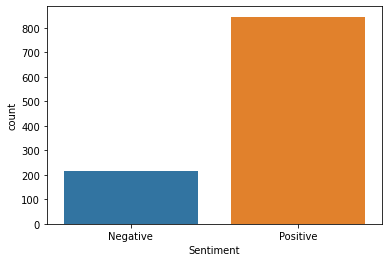

In [106]:
import seaborn as sns
sns.countplot(x='Sentiment', data=resturantreviews)
plt.show()

In [107]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [108]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [109]:
X = []
sentences = list(resturantreviews['tweet'])
for sen1 in sentences:
    X.append(preprocess_text(str(sen1)))

In [110]:
y = resturantreviews['Sentiment']
y = np.array(list(map(lambda x: 1 if x=="Positive" else 0, y)))
y

array([0, 0, 0, ..., 1, 1, 1])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [112]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [113]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [114]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [115]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [116]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [117]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          513900    
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 523,901
Trainable params: 10,001
Non-trainable params: 513,900
_________________________________________________________________
None


In [118]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
10/10 [==============================] - 1s 26ms/step - loss: 0.6684 - acc: 0.6141 - val_loss: 0.6609 - val_acc: 0.6344
Epoch 2/6
10/10 [==============================] - 0s 8ms/step - loss: 0.6004 - acc: 0.6930 - val_loss: 0.6442 - val_acc: 0.6406
Epoch 3/6
10/10 [==============================] - 0s 8ms/step - loss: 0.5547 - acc: 0.7328 - val_loss: 0.6363 - val_acc: 0.6406
Epoch 4/6
10/10 [==============================] - 0s 8ms/step - loss: 0.5229 - acc: 0.7594 - val_loss: 0.6388 - val_acc: 0.6594
Epoch 5/6
10/10 [==============================] - 0s 11ms/step - loss: 0.4951 - acc: 0.7922 - val_loss: 0.6337 - val_acc: 0.6625
Epoch 6/6
10/10 [==============================] - 0s 8ms/step - loss: 0.4721 - acc: 0.8195 - val_loss: 0.6301 - val_acc: 0.6750


In [119]:
score = model.evaluate(X_test, y_test, verbose=1)

13/13 [==============================] - 0s 2ms/step - loss: 0.5935 - acc: 0.7157


In [120]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5935196280479431
Test Accuracy: 0.7157106995582581


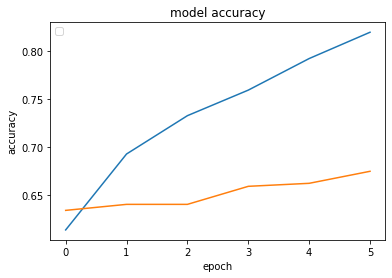

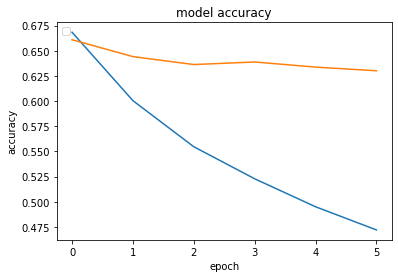

In [121]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

LSTM EVRİŞİMLİ SİNİR AĞLARI SINIFLANDIRMA

In [122]:

from keras.layers import Conv1D
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [123]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          513900    
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 578,157
Trainable params: 64,257
Non-trainable params: 513,900
_________________________________________________________________
None


In [124]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
10/10 [==============================] - 2s 129ms/step - loss: 0.7109 - acc: 0.5961 - val_loss: 0.5818 - val_acc: 0.6906
Epoch 2/6
10/10 [==============================] - 1s 105ms/step - loss: 0.5387 - acc: 0.7180 - val_loss: 0.5411 - val_acc: 0.7094
Epoch 3/6
10/10 [==============================] - 1s 102ms/step - loss: 0.4697 - acc: 0.8078 - val_loss: 0.5142 - val_acc: 0.7719
Epoch 4/6
10/10 [==============================] - 1s 104ms/step - loss: 0.4114 - acc: 0.8500 - val_loss: 0.5017 - val_acc: 0.7781
Epoch 5/6
10/10 [==============================] - 1s 106ms/step - loss: 0.3709 - acc: 0.8938 - val_loss: 0.4784 - val_acc: 0.7812
Epoch 6/6
13/13 [==============================] - 0s 13ms/step - loss: 0.4833 - acc: 0.7581


In [125]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4832889139652252
Test Accuracy: 0.7581047415733337


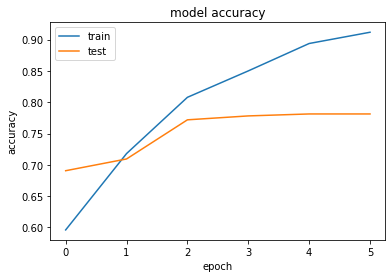

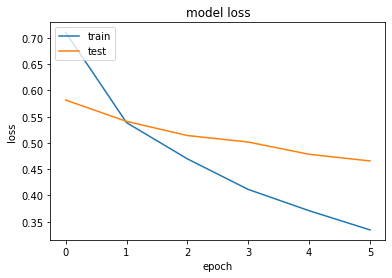

In [126]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

TEKRARLAYAN SİNİR AĞI MODELİ İLE METİN SINIFLANDIRMA

In [127]:
from tensorflow.keras.layers import LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [128]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          513900    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 631,277
Trainable params: 117,377
Non-trainable params: 513,900
_________________________________________________________________
None


In [129]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
10/10 [==============================] - 13s 700ms/step - loss: 0.6865 - acc: 0.5742 - val_loss: 0.6760 - val_acc: 0.5844
Epoch 2/6
10/10 [==============================] - 4s 345ms/step - loss: 0.6654 - acc: 0.5906 - val_loss: 0.6537 - val_acc: 0.5969
Epoch 3/6
10/10 [==============================] - 3s 349ms/step - loss: 0.6017 - acc: 0.6414 - val_loss: 0.5863 - val_acc: 0.6687
Epoch 4/6
10/10 [==============================] - 3s 347ms/step - loss: 0.5743 - acc: 0.6719 - val_loss: 0.5775 - val_acc: 0.6625
Epoch 5/6
10/10 [==============================] - 3s 351ms/step - loss: 0.5550 - acc: 0.6836 - val_loss: 0.5803 - val_acc: 0.6719
Epoch 6/6
13/13 [==============================] - 1s 60ms/step - loss: 0.5474 - acc: 0.7057


In [130]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5473896861076355
Test Accuracy: 0.7057356834411621


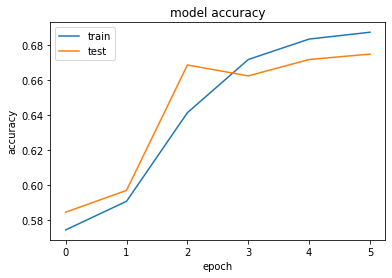

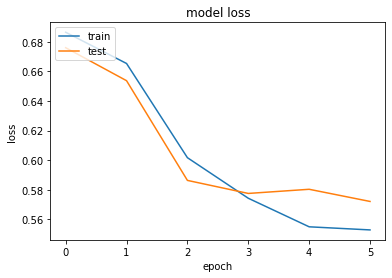

In [131]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [146]:
instance = X[10]
print(instance)

 FIFAWorldCup Shameful officiating Just hand over the trophy to Messi The obvious Ridiculous penalty 


In [147]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

1/1 [==============================] - 0s 27ms/step


array([[0.75753605]], dtype=float32)